importing essential libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

 2152 images mottam anni kalisi [68 batches ga vidipoyayii] and oka batch lo [32 images unnayii]

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=20

Loading data into tensorflow dataset

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    
    r'C:\Users\SrivalliAvala\Downloads\archive\PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [11]:
68*32

2176

oka batch lo una images and oka batch lo unna images labels(perulu) telusukotaniki

In [23]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 2 1 1 1 1 1 1 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 2 0 0 1 0 1]


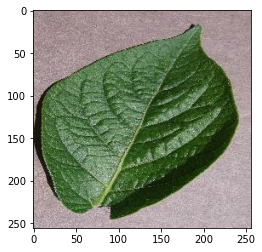

In [24]:
plt.imshow(image_batch[4].numpy().astype("uint8"))


Text(0.5, 1.0, 'Potato___healthy')

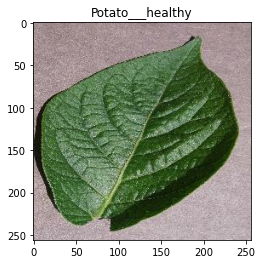

In [25]:
plt.imshow(image_batch[4].numpy().astype("uint8"))
plt.title(class_names[labels_batch[4]])

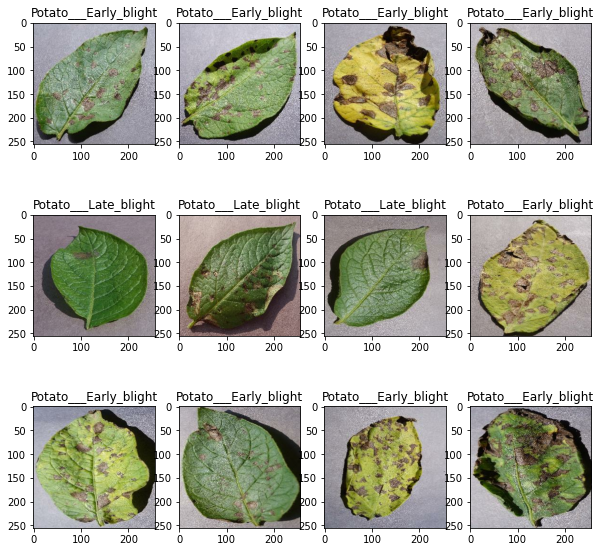

In [26]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range (12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])


In [27]:
len(dataset)

68

In [ ]:
80%-->>train data
20%-->>10% validation & 10% test data

In [29]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [30]:
train_ds=dataset.take(54)
len(train_ds)

54

In [31]:
test_ds=dataset.skip(len(train_ds))
len(test_ds)

14

In [32]:
val_size = 0.1
val_ds = len(dataset)*val_size
val_ds

6.800000000000001

In [33]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [34]:
train_ds=test_ds.skip(len(val_ds))
len(train_ds)

8

In [35]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [36]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [37]:
len(train_ds)

54

In [38]:
len(val_ds)

6

In [39]:
len(test_ds)

8

cache & prefetch works only on tf version 2.5.0 but my version is 2.3.0 . so they does not but ok

In [40]:
tf.__version__

'2.3.0'

In [48]:
#train_ds = train_ds.cache().shuffle=(1000).prefetch(tf.data.AUTOTUNE)
#test_ds = test_ds.cache().shuffle=(1000).prefetch(tf.data.AUTOTUNE)
#val_ds = val_ds.cache().shuffle=(1000).prefetch(tf.data.AUTOTUNE)

AttributeError: 'int' object has no attribute 'prefetch'

In [41]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

Data Augmentation

In [43]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

CNN

In [44]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [46]:
model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
54/54 [==============================] - 98s 2s/step - loss: 0.9081 - accuracy: 0.4812 - val_loss: 0.9003 - val_accuracy: 0.4271
Epoch 2/20
54/54 [==============================] - 94s 2s/step - loss: 0.7102 - accuracy: 0.6408 - val_loss: 0.5586 - val_accuracy: 0.7679
Epoch 3/20
54/54 [==============================] - 97s 2s/step - loss: 0.4580 - accuracy: 0.8119 - val_loss: 0.4288 - val_accuracy: 0.8177
Epoch 4/20
54/54 [==============================] - 97s 2s/step - loss: 0.3287 - accuracy: 0.8703 - val_loss: 0.3129 - val_accuracy: 0.8646
Epoch 5/20
54/54 [==============================] - 99s 2s/step - loss: 0.2854 - accuracy: 0.8803 - val_loss: 0.2770 - val_accuracy: 0.8594
Epoch 6/20
54/54 [==============================] - 99s 2s/step - loss: 0.2855 - accuracy: 0.8803 - val_loss: 0.2857 - val_accuracy: 0.8594
Epoch 7/20
54/54 [==============================] - 99s 2s/step - loss: 0.2119 - accuracy: 0.9219 - val_loss: 0.2193 - val_accuracy: 0.9115
Epoch 8/20
54/54 [==

In [109]:
for image_batch, labels_batch in test_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 2 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1]


Text(0.5, 1.0, 'Potato___healthy')

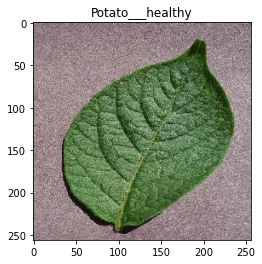

In [110]:
plt.imshow(image_batch[1].numpy().astype("uint8"))
plt.title(class_names[labels_batch[1]])

actual_output: Potato___healthy


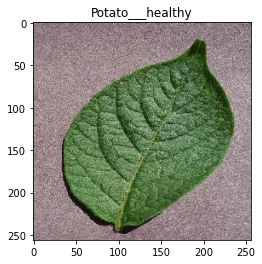

In [111]:
plt.imshow(image_batch[1].numpy().astype("uint8"))
plt.title(class_names[labels_batch[1]])


print('actual_output:',class_names[labels_batch[1]])

ValueError: in user code:

    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\SrivalliAvala\.conda\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer conv2d is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [256, 256, 3]


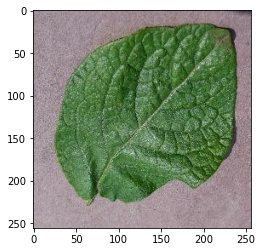

In [87]:
plt.imshow(image_batch.numpy().astype("uint8"))
predicted_output=model.predict(image_batch[1])
 
 

#predicted_output[1]
#plt.imshow(predicted_output[1])
#plt.imshow(image_batch[1].numpy().astype("uint8"))


In [93]:
batch_prediction = model.predict(image_batch)


In [97]:
class_names[(batch_prediction)]

TypeError: only integer scalar arrays can be converted to a scalar index

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


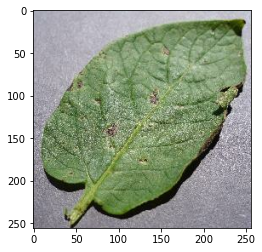

In [116]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[1].numpy().astype('uint8')
    first_label = labels_batch[1].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[1])])

In [118]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

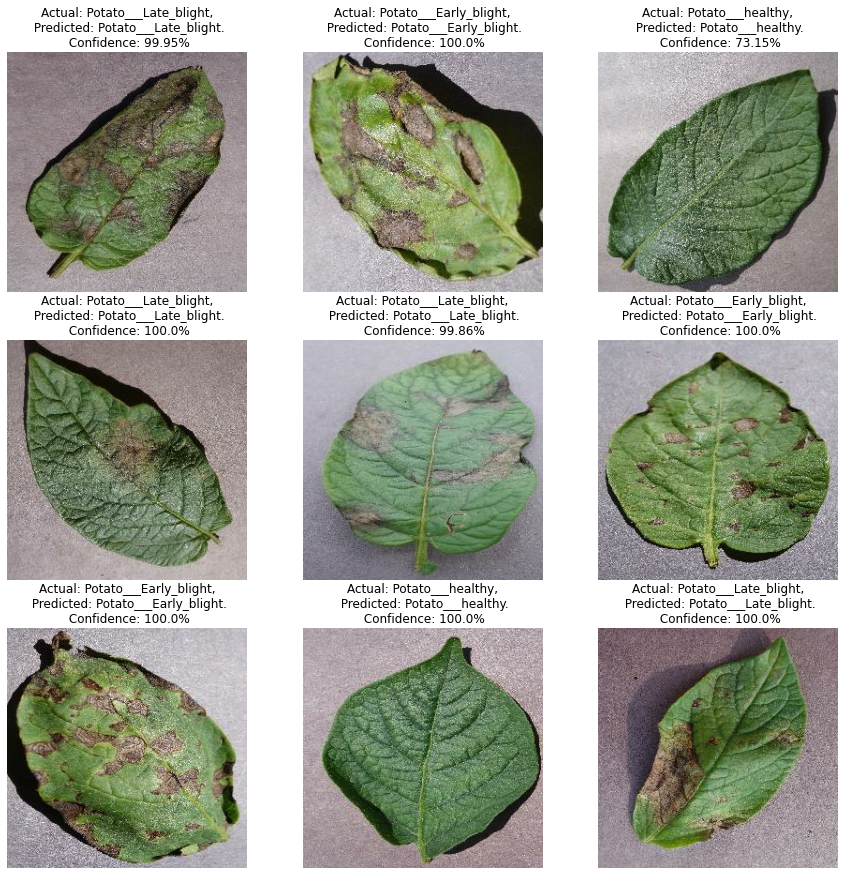

In [120]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")